Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

Evaluation:
Goal

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 
Metric

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)
link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

## Import the library
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from scipy.stats import skew
from scipy.special import boxcox1p 

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [5]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
all_df = all_data.copy()

In [8]:
all_data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA

In [9]:
all_data.nunique()

MSSubClass         16
MSZoning            5
LotFrontage       128
LotArea          1951
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         118
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          3
MasVnrArea        444
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        991
BsmtFinType2        6
BsmtFinSF2        272
BsmtUnfSF        1135
TotalBsmtSF      1058
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF         1083
2ndFlrSF          635
LowQualFinSF       36
GrLivArea 

####  У нас имеется 79  feature columns, и целевая переменная это SalePrice. 
#### Если посмотреть, здесь мы можем видеть категориальные и числовые столбцы.
#### В столбцах такие как Alley, PoolQC, Fence, MiscFeature очень большие пропущенные значения, конечно и в других имеется пропущенные значения, но не столь критичные.
#### Далее, я попытаюсь поработать с пропущенными значениями, то есть оставлять их, какими методоми заполнить пустые места или же удалить

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

#### Тут выбросы не наблюдаются, все ок

In [10]:
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [11]:
all_data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,1153,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,2310,2876,1025,1014,879,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402


### Sales Price Distribution

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


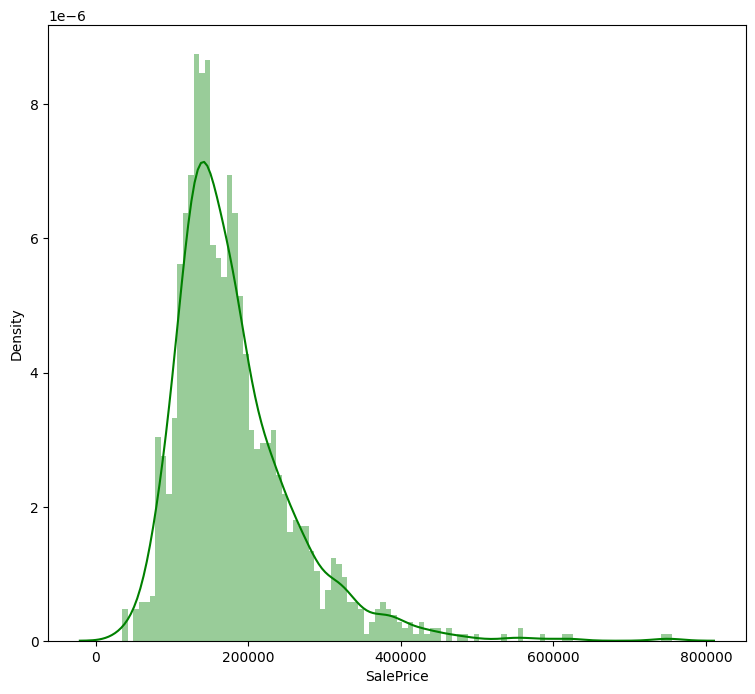

In [13]:
print(train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

#### Как мы можем видеть при визуальной оцениваний у нас имеется скошенность, и эта скошенность может повлиять на наши модельки, к предобработке и тд
#### Я попробую исправить ассимметрию, использовав преобразование логарифмом, бокс кокс и тд и визуально оценю какая лучше подойдет

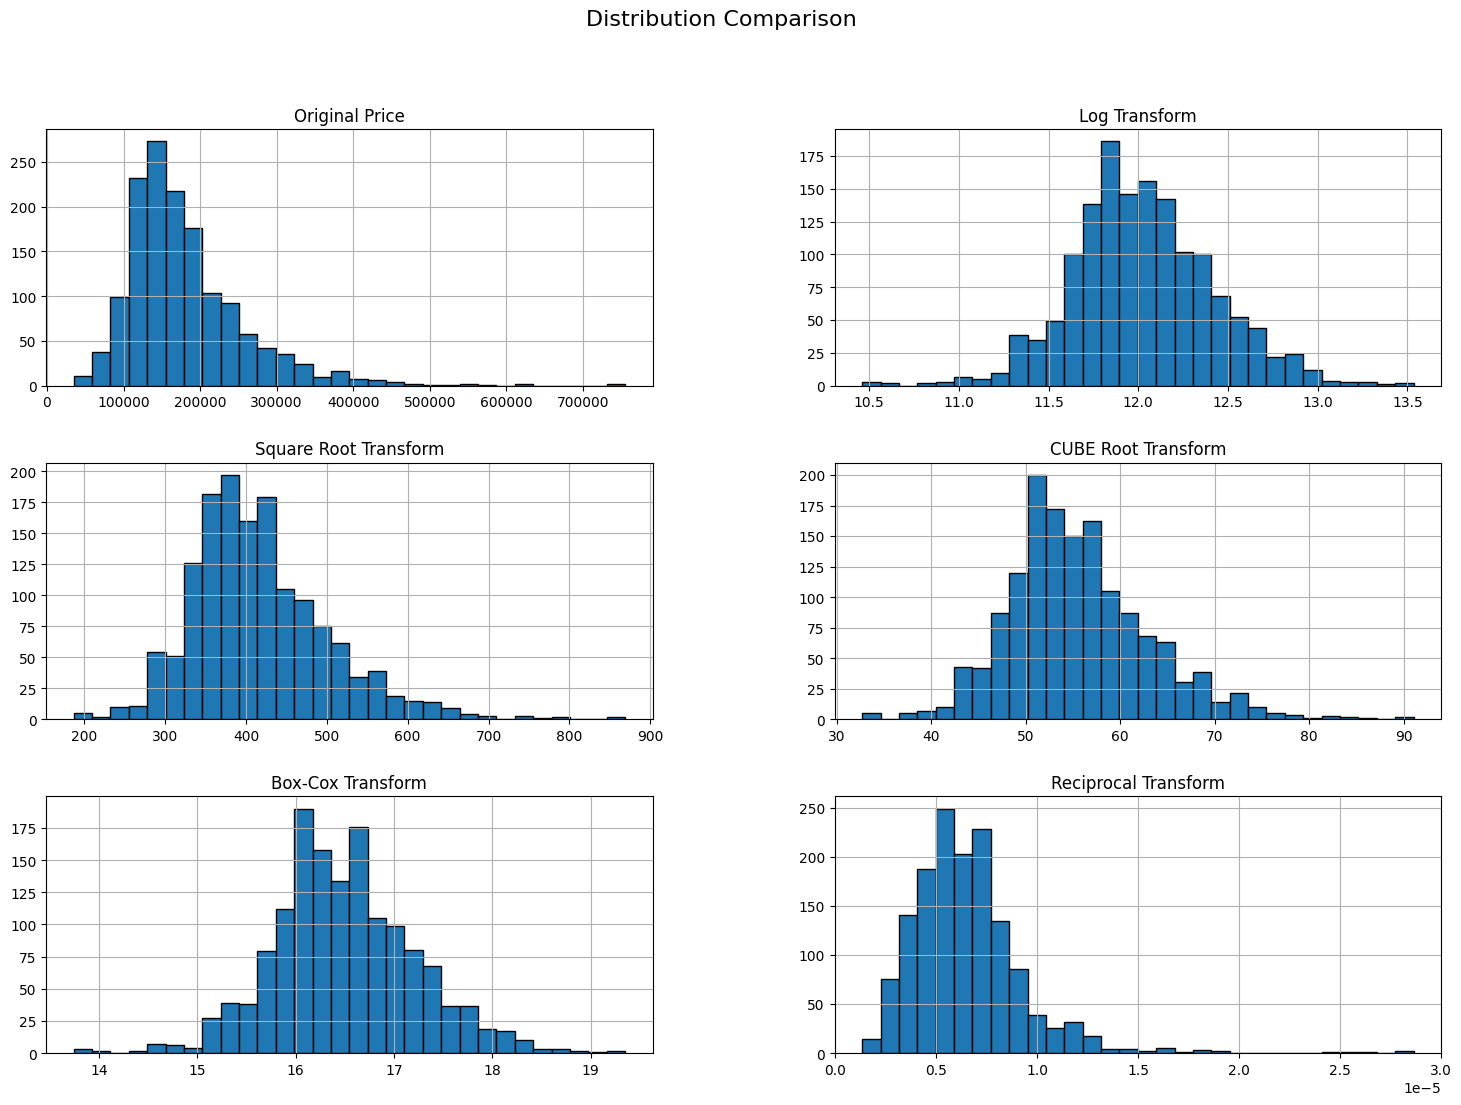

In [12]:
plt.rcParams['figure.figsize'] = (18.0, 12.0)

prices = pd.DataFrame({
    "Original Price": train["SalePrice"],
    "Log Transform": np.log1p(train["SalePrice"]),
    "Square Root Transform": np.sqrt(train["SalePrice"]),
    "CUBE Root Transform": np.cbrt(train["SalePrice"]),
    "Box-Cox Transform": boxcox1p(train["SalePrice"], 0.05),  
    # "Yeo-Johnson Transform": yeojohnson(df["SalePrice"])[0],
    "Reciprocal Transform": 1 / (train["SalePrice"] + 1)
})


prices.hist(bins=30, edgecolor='black')
plt.suptitle('Distribution Comparison', fontsize=16)
plt.show()

#### Здесь хорошо себя показывают Log Transform и Box-Cox Transform
#### Далее, буду работать с этими двуми вариантами и будем сравнивать какая лучше

#### модель Catboost 
#### Этот набор данных содержит смесь числовых, категориальных и отсутствующих признаков, скошенные данные. Модель, которая обладает хорошей способностью обработки числовых и категориальных данных, а также устойчива к скошенным данным и пропущенным значениям, - это CatBoost.
#### Опробуем модель тоже

#### Взглянем на корреляцию

In [14]:
train.drop('Id', axis=1, inplace=True) # Этот столбец не имеет никакого отношения, так что мы ее дропнем

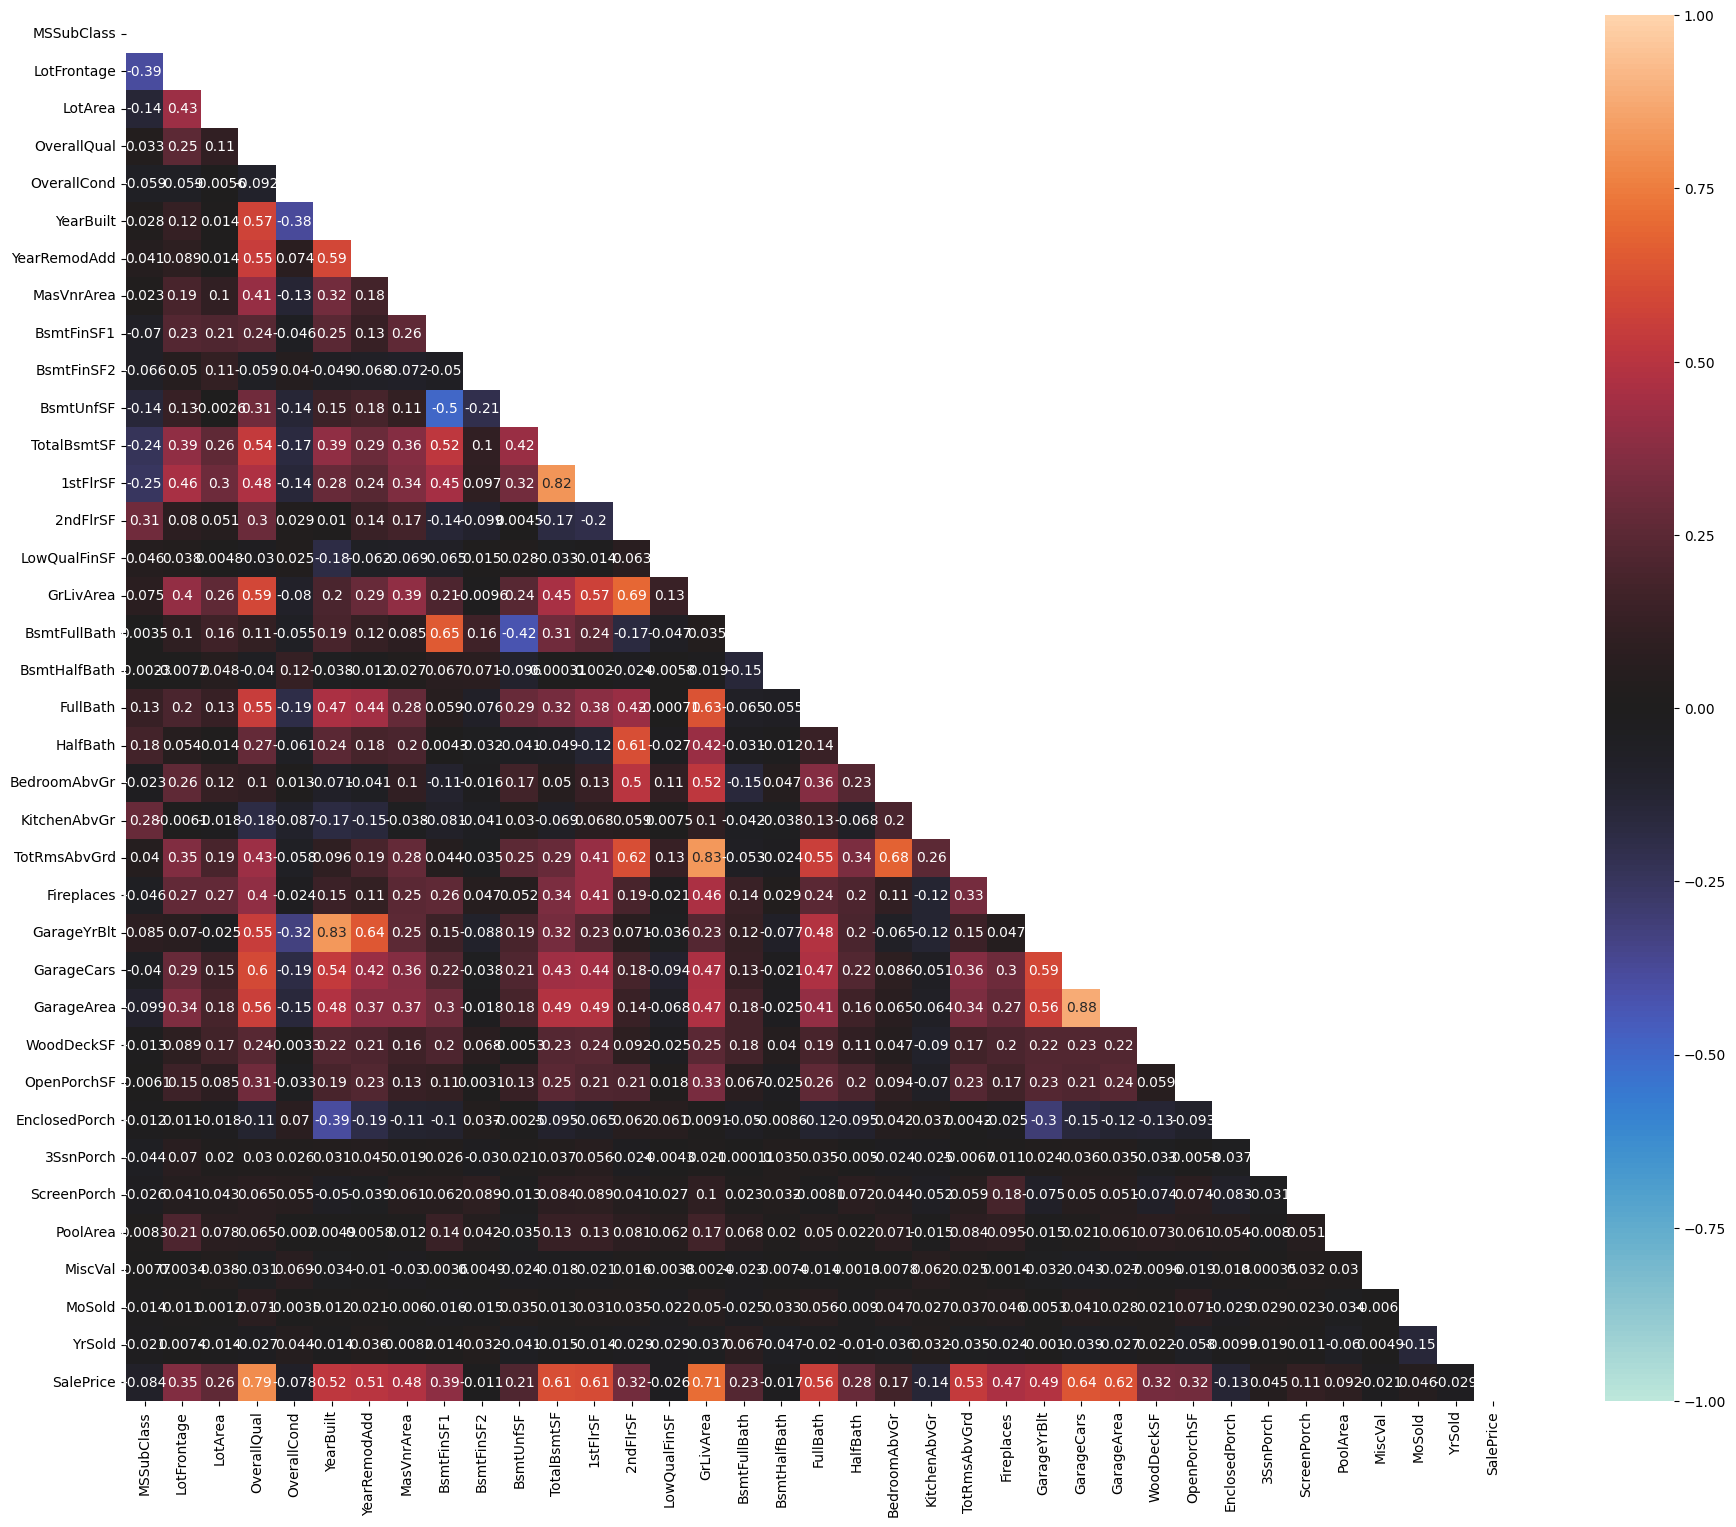

In [16]:
numeric_columns = train.select_dtypes(include=['number'])
matrix = np.triu(numeric_columns.corr())
corrmat = numeric_columns.corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat, vmin=-1, vmax=1, center= 0, square=True, annot=True, fmt='.2g', mask=matrix);

#### Опять же, как я ранее написал мы наблюдаем ассимметрию в положительную сторону, колонны такие как OverallQual, YearBuilt и тд имеют значительное влияние чем остальные
#### Так же хотелось отметить столбцы GarageArea and Garagecars по сути одно и тоже, хотя столбец Garagecars имеет корреляцию с целевой переменной чуть больше
#### GarageArea это площадь, Garagecars это средне сколько автомобилей в целом вместятся. Думаю клиентам намного проще именно сколько примерно машин вместятся, чем считать самим сколько же машин вместятся
#### Так что я дропну столбец GarageArea

In [18]:
all_data.drop('GarageArea', axis=1, inplace=True) 

#### Так же я решил дропнуть такие столбцы как, BsmtFinSF1 и BsmtFinSF2, потому что у нас есть столбец TotalBsmtSF(то есть итог, BsmtFinSF1 + BsmtFinSF2)
#### Далее дропнуть решил те, которые имеют слишком маленькую корреляцию

##### upd: Ранее когда я не удалял столбцы с малой корреляцией, результаты были хуже
##### тот код в другом файле

In [21]:
col = ['MSSubClass', 'OverallCond', 'BsmtHalfBath', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 
all_data.drop(columns=col, axis=1, inplace=True) 

### Data preprocessing np.log1p
#### с удалением столбцов которые имеют большое колво пропущенных значений, и как я ранее написал буду так же пробовать без удаления 
#### тут будет со средними значениями, а другая с медианной 

In [22]:
col = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
all_data.drop(columns=col, axis=1, inplace=True)

#### Здесь сначала попробую с трансформированием np.log1p

In [23]:
train["SalePrice"] = np.log1p(train["SalePrice"])

# get numeric features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))

# фильтрация скошенности  > 0.75
skewed_feats = skewed_feats[skewed_feats > 0.75].index

for feat in skewed_feats:
    all_data[feat] = np.log1p(all_data[feat])

#### Выбрал метод кодировки One-Hot Encoding, по моему мнению будет самой оптимальной, конечно в некоторых столбцах имеется большое колво уникальных значений и может привести к разреженным данным. Но в отличий Label Encoding и Target Encoding  будет по лучше

In [24]:
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.median())

#### разделяем на тест и трэйн, метрика у нас будет rmse с кросс валидацией 

In [25]:
X_train = all_data[:train.shape[0]]
X_test = all_data[test.shape[0]+1:]
y = train.SalePrice



In [26]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)


#### Тут представлены модели, некоторые из них чувствительны к выбросам, например КНН, но тут я их не наблюдаю
#### Так же трудновато подбирать гиперпараметры для настроект модели, но спасибо чатгпт, какие то подогнал и я их использовал, конечно же немного от себя изменил в параметрах
#### Есть модели которые хорошо работают с мультикоррилинеарностью, но я не проверял на их наличие
#### Имеется модели которые хорошо работают с большим количеством признаков
#### и так же ряд многих преимуществ и недостатков и тд

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV, ElasticNetCV, Ridge
from lightgbm import LGBMRegressor
from sklearn.svm import SVR


# Тюнинг параметров LGBMRegressor
lgbm_params = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 500, 1000], 'max_depth': [3, 5, 7], 'num_leaves': [2, 10, 31, 50]}
grid_lgbm = GridSearchCV(LGBMRegressor(random_state=42, verbose=-1), param_grid=lgbm_params)
grid_lgbm.fit(X_train, y)
best_params_lgbm = grid_lgbm.best_params_


# Тюнинг параметров LassoCV
param_grid_lasso = {'eps': [1e-4, 1e-3, 1e-2], 'n_alphas': [100, 500, 1000], 'max_iter': [500, 1000, 1500]}
grid_lasso = GridSearchCV(LassoCV(), param_grid=param_grid_lasso)
grid_lasso.fit(X_train, y)
best_params_lasso = grid_lasso.best_params_


# Тюнинг параметров ElasticNetCV
param_grid_enet = {'l1_ratio': [0.1, 0.5, 0.7, 0.9], 'eps': [1e-4, 1e-3, 1e-2], 'n_alphas': [100, 500, 1000], 'max_iter': [500, 1000, 1500]}
grid_enet = GridSearchCV(ElasticNetCV(), param_grid=param_grid_enet)
grid_enet.fit(X_train, y)
best_params_enet = grid_enet.best_params_


# Tюнинг параметров XGBRegressor
xgb_params = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 500, 1000], 'max_depth': [3, 5, 7]}
grid_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid=xgb_params)
grid_xgb.fit(X_train, y)
best_params_xgb = grid_xgb.best_params_


# Tюнинг параметров AdaBoostRegressor
adaboost_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
grid_adaboost = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid=adaboost_params)
grid_adaboost.fit(X_train, y)
best_params_adaboost = grid_adaboost.best_params_


# Tюнинг параметров KNeighborsRegressor
knn_params = {'n_neighbors': [3, 5, 7, 9, 13, 15, 20, 28, 35, 48, 50]}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid=knn_params)
grid_knn.fit(X_train, y)
best_params_knn = grid_knn.best_params_


# Тюнинг параметров Ridge Regression
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 20, 50, 100, 150]}
grid_ridge = GridSearchCV(Ridge(), param_grid=param_grid_ridge)
grid_ridge.fit(X_train, y)
best_alpha_ridge = grid_ridge.best_params_['alpha']


# Тюнинг параметров Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 50, 100], 'min_samples_split': [2, 5, 10]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid_rf)
grid_rf.fit(X_train, y)
best_params_rf = grid_rf.best_params_


# Тюнинг параметров Gradient Boosting
param_grid_gb = {'n_estimators': [50, 100, 200, 300, 500], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=param_grid_gb)
grid_gb.fit(X_train, y)
best_params_gb = grid_gb.best_params_


# Тюнинг параметров SVR
param_grid_svr = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf']}
grid_svr = GridSearchCV(SVR(), param_grid=param_grid_svr)
grid_svr.fit(X_train, y)
best_params_svr = grid_svr.best_params_


# Обновленные модели с оптимальными параметрами
models_tuned = {'Ridge': Ridge(alpha=best_alpha_ridge),
                'Random Forest': RandomForestRegressor(**best_params_rf, random_state=42),
                'Gradient Boosting': GradientBoostingRegressor(**best_params_gb, random_state=42),
                'SVR': SVR(**best_params_svr),
                'AdaBoost': AdaBoostRegressor(**best_params_adaboost, random_state=42),
                'KNN': KNeighborsRegressor(**best_params_knn),
                'XGB': XGBRegressor(**best_params_xgb, random_state=42),
                'LassoCV': LassoCV(**best_params_lasso),
                'ElasticNetCV': ElasticNetCV(**best_params_enet),
                'LGBMRegressor': LGBMRegressor(**best_params_lgbm, random_state=42, verbose=-1)
               }

# Оценка качества моделей
for model_name, model in models_tuned.items():
    score = rmse_cv(model).mean()
    print(f"{model_name} RMSE: {score}")

# Обучение моделей с оптимальными параметрами на всем тренировочном наборе данных
for model_name, model in models_tuned.items():
    model.fit(X_train, y)




Ridge RMSE: 0.13076869827725307
Random Forest RMSE: 0.14644226963007317
Gradient Boosting RMSE: 0.13120666308126563
SVR RMSE: 0.30000975064221275
AdaBoost RMSE: 0.17696436732771087
KNN RMSE: 0.23422618496707312
XGB RMSE: 0.13196982592699527
LassoCV RMSE: 0.12766604871424056
ElasticNetCV RMSE: 0.12761418664690988
LGBMRegressor RMSE: 0.13289992285116797


#### если посмотреть тут RMSE с лучшим показателем показывают LassoCV и ElasticNetCV. При сабмите в каггл, лучшим показал себе LGBMRegressor

In [36]:
# Получение и сохранение предсказаний каждой модели в отдельный CSV файл
for model_name, model in models_tuned.items():
    predictions = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": np.expm1(model.predict(X_test))
    })
    predictions.to_csv(f"predictions_{model_name}_logMedianDel.csv", index=False)

## Data preprocessing boxcox1p median


In [13]:
train_box = pd.read_csv('train.csv')
test_box = pd.read_csv('test.csv')

In [14]:
all_data_box = pd.concat((train_box.loc[:,'MSSubClass':'SaleCondition'],
                      test_box.loc[:,'MSSubClass':'SaleCondition']))

In [15]:
train_box.drop('Id', axis=1, inplace=True) 

In [16]:
col = ['MSSubClass', 'OverallCond', 'BsmtHalfBath', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageArea'] 
all_data_box.drop(columns=col, axis=1, inplace=True) 

In [17]:
col = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
all_data_box.drop(columns=col, axis=1, inplace=True)


In [18]:
train_box["SalePrice"] = boxcox1p(train_box["SalePrice"], 0.05)

# get numeric features
numeric_feats = all_data_box.dtypes[all_data_box.dtypes != "object"].index

# compute skewness for each numeric feature
skewed_feats = train_box[numeric_feats].apply(lambda x: skew(x.dropna()))

# filter features with skewness > 0.75
skewed_feats = skewed_feats[skewed_feats > 0.75].index

# apply Box-Cox transformation to reduce skewness
for feat in skewed_feats:
    all_data_box[feat] = boxcox1p(all_data_box[feat], 0.05)

In [19]:
all_data_box = pd.get_dummies(all_data_box)
all_data_box = all_data_box.fillna(all_data_box.median())

In [20]:
X_train = all_data_box[:train_box.shape[0]]
X_test = all_data_box[test_box.shape[0]+1:]
y = train_box.SalePrice



In [21]:
%%time



from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV, ElasticNetCV, Ridge
from lightgbm import LGBMRegressor
from sklearn.svm import SVR


# Тюнинг параметров LGBMRegressor
lgbm_params = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 500, 1000], 'max_depth': [3, 5, 7], 'num_leaves': [2, 10, 31, 50]}
grid_lgbm = GridSearchCV(LGBMRegressor(random_state=42, verbose=-1), param_grid=lgbm_params)
grid_lgbm.fit(X_train, y)
best_params_lgbm = grid_lgbm.best_params_


# Тюнинг параметров LassoCV
param_grid_lasso = {'eps': [1e-4, 1e-3, 1e-2], 'n_alphas': [100, 500, 1000], 'max_iter': [500, 1000, 1500]}
grid_lasso = GridSearchCV(LassoCV(), param_grid=param_grid_lasso)
grid_lasso.fit(X_train, y)
best_params_lasso = grid_lasso.best_params_


# Тюнинг параметров ElasticNetCV
param_grid_enet = {'l1_ratio': [0.1, 0.5, 0.7, 0.9], 'eps': [1e-4, 1e-3, 1e-2], 'n_alphas': [100, 500, 1000], 'max_iter': [500, 1000, 1500]}
grid_enet = GridSearchCV(ElasticNetCV(), param_grid=param_grid_enet)
grid_enet.fit(X_train, y)
best_params_enet = grid_enet.best_params_


# Tюнинг параметров XGBRegressor
xgb_params = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 500, 1000], 'max_depth': [3, 5, 7]}
grid_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid=xgb_params)
grid_xgb.fit(X_train, y)
best_params_xgb = grid_xgb.best_params_


# Tюнинг параметров AdaBoostRegressor
adaboost_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
grid_adaboost = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid=adaboost_params)
grid_adaboost.fit(X_train, y)
best_params_adaboost = grid_adaboost.best_params_


# Tюнинг параметров KNeighborsRegressor
knn_params = {'n_neighbors': [3, 5, 7, 9, 13, 15, 20, 28, 35, 48, 50]}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid=knn_params)
grid_knn.fit(X_train, y)
best_params_knn = grid_knn.best_params_


# Тюнинг параметров Ridge Regression
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 20, 50, 100, 150]}
grid_ridge = GridSearchCV(Ridge(), param_grid=param_grid_ridge)
grid_ridge.fit(X_train, y)
best_alpha_ridge = grid_ridge.best_params_['alpha']


# Тюнинг параметров Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 50, 100], 'min_samples_split': [2, 5, 10]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid_rf)
grid_rf.fit(X_train, y)
best_params_rf = grid_rf.best_params_


# Тюнинг параметров Gradient Boosting
param_grid_gb = {'n_estimators': [50, 100, 200, 300, 500], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=param_grid_gb)
grid_gb.fit(X_train, y)
best_params_gb = grid_gb.best_params_


# Тюнинг параметров SVR
param_grid_svr = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf']}
grid_svr = GridSearchCV(SVR(), param_grid=param_grid_svr)
grid_svr.fit(X_train, y)
best_params_svr = grid_svr.best_params_


# Обновленные модели с оптимальными параметрами
models_tuned = {'Ridge': Ridge(alpha=best_alpha_ridge),
                'Random Forest': RandomForestRegressor(**best_params_rf, random_state=42),
                'Gradient Boosting': GradientBoostingRegressor(**best_params_gb, random_state=42),
                'SVR': SVR(**best_params_svr),
                'AdaBoost': AdaBoostRegressor(**best_params_adaboost, random_state=42),
                'KNN': KNeighborsRegressor(**best_params_knn),
                'XGB': XGBRegressor(**best_params_xgb, random_state=42),
                'LassoCV': LassoCV(**best_params_lasso),
                'ElasticNetCV': ElasticNetCV(**best_params_enet),
                'LGBMRegressor': LGBMRegressor(**best_params_lgbm, random_state=42, verbose=-1)
               }

# Оценка качества моделей
for model_name, model in models_tuned.items():
    score = rmse_cv(model).mean()
    print(f"{model_name} RMSE: {score}")

# Обучение моделей с оптимальными параметрами на всем тренировочном наборе данных
for model_name, model in models_tuned.items():
    model.fit(X_train, y)




Ridge RMSE: 0.23760255462366633
Random Forest RMSE: 0.26632462929654527
Gradient Boosting RMSE: 0.23748413373092112
SVR RMSE: 0.5559036196745549
AdaBoost RMSE: 0.32122947104060795
KNN RMSE: 0.42659519945989094
XGB RMSE: 0.23855751659294086
LassoCV RMSE: 0.23263736873716584
ElasticNetCV RMSE: 0.2327247025495373
LGBMRegressor RMSE: 0.24178634099804253
CPU times: user 58min 27s, sys: 57min 29s, total: 1h 55min 57s
Wall time: 30min 37s


In [ ]:
# Получение и сохранение предсказаний каждой модели в отдельный CSV файл
for model_name, model in models_tuned.items():
    predictions = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": np.expm1(model.predict(X_test))
    })
    predictions.to_csv(f"predictions_{model_name}_boxCoxMedianDel.csv", index=False)

## Data preprocessing np.log1p med mode



#### Тут заполнение пропущенных значений для числовых столбцов по среднему значению, а для столбцов типа обджект это мода

In [2]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV, ElasticNetCV, Ridge
from lightgbm import LGBMRegressor
from sklearn.impute import SimpleImputer

# Считываем данные
train_log = pd.read_csv('train.csv')
test_log = pd.read_csv('test.csv')
all_data_log = pd.concat((train_log.loc[:, 'MSSubClass':'SaleCondition'],
                          test_log.loc[:, 'MSSubClass':'SaleCondition']))

# Убираем столбец 'Id'
train_log.drop('Id', axis=1, inplace=True)

# Убираем выбранные числовые столбцы
col_to_drop = ['MSSubClass', 'OverallCond', 'BsmtHalfBath', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
               'BsmtUnfSF', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageArea']
all_data_log.drop(columns=col_to_drop, axis=1, inplace=True)

# Убираем выбранные категориальные столбцы
col_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
all_data_log.drop(columns=col_to_drop, axis=1, inplace=True)

# Преобразуем целевую переменную 'SalePrice'
train_log["SalePrice"] = np.log1p(train_log["SalePrice"])

# Заполняем пропущенные значения для числовых столбцов средним значением
numeric_feats = all_data_log.dtypes[all_data_log.dtypes != "object"].index
all_data_log[numeric_feats] = all_data_log[numeric_feats].fillna(all_data_log[numeric_feats].mean())

# Заполняем пропущенные значения для категориальных столбцов модой
categorical_feats = all_data_log.dtypes[all_data_log.dtypes == "object"].index
all_data_log[categorical_feats] = all_data_log[categorical_feats].fillna(all_data_log[categorical_feats].mode().iloc[0])

# Преобразуем категориальные столбцы в dummy-переменные
all_data_log = pd.get_dummies(all_data_log)

# # Разделяем данные обратно на тренировочный и тестовый наборы
# X_train_log = all_data_log[:train_log.shape[0]]
# X_test_log = all_data_log[train_log.shape[0] + 1:]
# y_log = train_log.SalePrice

In [6]:
X_train = all_data_log[:train_log.shape[0]]
X_test = all_data_log[test_log.shape[0]+1:]
y = train_log.SalePrice



In [7]:
# Тюнинг параметров LGBMRegressor
lgbm_params = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 500, 1000], 'max_depth': [3, 5, 7], 'num_leaves': [2, 10, 31, 50]}
grid_lgbm = GridSearchCV(LGBMRegressor(random_state=42, verbose=-1), param_grid=lgbm_params)
grid_lgbm.fit(X_train, y)
best_params_lgbm = grid_lgbm.best_params_


# Тюнинг параметров LassoCV
param_grid_lasso = {'eps': [1e-4, 1e-3, 1e-2], 'n_alphas': [100, 500, 1000], 'max_iter': [500, 1000]}
grid_lasso = GridSearchCV(LassoCV(), param_grid=param_grid_lasso)
grid_lasso.fit(X_train, y)
best_params_lasso = grid_lasso.best_params_


# Тюнинг параметров ElasticNetCV
param_grid_enet = {'l1_ratio': [0.1, 0.5, 0.7, 0.9], 'eps': [1e-4, 1e-3, 1e-2], 'n_alphas': [100, 500, 1000], 'max_iter': [500, 1000]}
grid_enet = GridSearchCV(ElasticNetCV(), param_grid=param_grid_enet)
grid_enet.fit(X_train, y)
best_params_enet = grid_enet.best_params_


# Tюнинг параметров XGBRegressor
xgb_params = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 500, 1000], 'max_depth': [3, 5, 7]}
grid_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid=xgb_params)
grid_xgb.fit(X_train, y)
best_params_xgb = grid_xgb.best_params_


# Tюнинг параметров AdaBoostRegressor
adaboost_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
grid_adaboost = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid=adaboost_params)
grid_adaboost.fit(X_train, y)
best_params_adaboost = grid_adaboost.best_params_



# Тюнинг параметров Ridge Regression
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 20, 50]}
grid_ridge = GridSearchCV(Ridge(), param_grid=param_grid_ridge)
grid_ridge.fit(X_train, y)
best_alpha_ridge = grid_ridge.best_params_['alpha']


# Тюнинг параметров Random Forest
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20, 50], 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid_rf)
grid_rf.fit(X_train, y)
best_params_rf = grid_rf.best_params_


# Тюнинг параметров Gradient Boosting
param_grid_gb = {'n_estimators': [200, 300, 500], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 4]}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=param_grid_gb)
grid_gb.fit(X_train, y)
best_params_gb = grid_gb.best_params_





# Обновленные модели с оптимальными параметрами
models_tuned = {'Ridge': Ridge(alpha=best_alpha_ridge),
                'Random Forest': RandomForestRegressor(**best_params_rf, random_state=42),
                'Gradient Boosting': GradientBoostingRegressor(**best_params_gb, random_state=42),
                'AdaBoost': AdaBoostRegressor(**best_params_adaboost, random_state=42),
                'XGB': XGBRegressor(**best_params_xgb, random_state=42),
                'LassoCV': LassoCV(**best_params_lasso),
                'ElasticNetCV': ElasticNetCV(**best_params_enet),
                'LGBMRegressor': LGBMRegressor(**best_params_lgbm, random_state=42, verbose=-1)
               }

# Оценка качества моделей
for model_name, model in models_tuned.items():
    score = rmse_cv(model).mean()
    print(f"{model_name} RMSE: {score}")

# Обучение моделей с оптимальными параметрами на всем тренировочном наборе данных
for model_name, model in models_tuned.items():
    model.fit(X_train, y)




Ridge RMSE: 0.14079345003099458
Random Forest RMSE: 0.1459485412813299
Gradient Boosting RMSE: 0.1293521668321069
AdaBoost RMSE: 0.1751155220601101
XGB RMSE: 0.13024559945731184
LassoCV RMSE: 0.1989519509613288
ElasticNetCV RMSE: 0.19895222876943472
LGBMRegressor RMSE: 0.13202794387388422


#### тут лучшим показал Gradient среди остальных, при сабмите кагл там показал лучший рез LGBMRegressor

In [9]:
# Получение и сохранение предсказаний каждой модели в отдельный CSV файл
for model_name, model in models_tuned.items():
    predictions = pd.DataFrame({
        "Id": test_log["Id"],
        "SalePrice": np.expm1(model.predict(X_test))
    })
    predictions.to_csv(f"predictions_{model_name}_logMeanModeDel.csv", index=False)

####

## Сatboost
#### target encoder
##### Что то пошло не так, и я не опробовал кэтбуст(

In [10]:
train_c = pd.read_csv('train.csv')
test_c = pd.read_csv('test.csv')

In [11]:
all_data_c = pd.concat((train_c.loc[:,'MSSubClass':'SaleCondition'],
                      test_c.loc[:,'MSSubClass':'SaleCondition']))

In [12]:
train_c.drop('Id', axis=1, inplace=True) 

In [13]:
X_train = all_data_c[:train_c.shape[0]]
X_test = all_data_c[test_c.shape[0]+1:]
y = train_c.SalePrice



In [26]:
# !pip3 install catboost

In [27]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np


ModuleNotFoundError: No module named 'catboost'

In [ ]:


# Определение функции rmse_cv
def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv=5))
    return rmse


# Определение параметров для поиска по сетке
param_grid = {
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

# Создание объекта модели CatBoost
catboost = CatBoostRegressor(loss_function='RMSE', cat_features=categorical_features_indices, verbose=100)

# Создание объекта для поиска по сетке
grid_search = GridSearchCV(catboost, param_grid, scoring=make_scorer(mean_squared_error, squared=False), cv=5)

# Выполнение поиска по сетке
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Предсказание на тестовом наборе с лучшими параметрами
y_pred = grid_search.best_estimator_.predict(X_test)

# Оценка качества модели
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Оценка качества модели с помощью rmse_cv
rmse_cv_score = rmse_cv(grid_search.best_estimator_, X_train, y_train)
print(f"Cross-validated RMSE: {rmse_cv_score.mean()}")


#### Методы предобработки
##### однозначно нельзя сказать, что один метод предобработки будет также хорошо работать с другой моделью
##### например кодирования категориальных признаков такие как one hot, lable encoding. Когда модель требует числовые данные, а в данных есть категориальные.
##### Так же выбор метода кодировки важен, например выбор кодировки категориальных признаков lable encoding, это создание избыточных зависимостей данных, а недостаток one hot в заключается в существенном увеличении объема данных. Хотя этот выбор наоборот идет в плюс, например для модели LGBMRegressor, а для КНН это в минус, так как она лучше работает с малым объемом данных

##### так же важна масштабирования признаков для моделей КНН и SVM 
##### методы регуляризаций при наличии мультиколлинеарности или для снижения влияния шума в данных
##### в ходе этой писанины я понял, что многое не опробовал(, например для Ridge Regression нужна балансированность данных, со скошенными данными не очень то справляется и поэтому тут хорошо помогла логарифмическая трансофрмация, и с другими моделями я опробовал с обработанной балансированным данным



#### Ridge Regression:
##### стабильна при высокой корреляции между признаками, и уменшает веса признаков, когда признаков много. Отлично подходит для этой задачи
##### с несбалансированными плохо справляется в отличий от других моделей, с применением логарифмической трансформации стабилен

#### Random Forest
##### Так же хорошо справляется как Ridge, при наличий большого колво признаков, устойчив к переобучению, главное контролиловать глубину. Хорошо подходит для данной задачи

#### Gradient Boosting
##### обладает высокой предсказательностью. к шумам и выбросам устойчив, и очень хорошо работает с большим колво признаков, в отличий малого колво, так же отлично подходит для этой задачи
##### сложно подбирать настройки для обучения

#### SVR
#####  очень чувствителен к выбору параметров и требователен к вычислительным ресурсам

#### AdaBoost
##### минимизация ошибок при обучений
##### чувствителен к выбросам и шумам, не подходит для данной задачи

#### KNN
##### прост в реализации
##### чувствителен к шуму и выбросам, нэффективен на больших наборах данных

#### XGBoost
##### высокая эффективность и масштабируемость, встроенные возможности обработки отсутствующих данных и регуляризации, так же подходит для данной задачи
##### требователен к ресурсам

#### LassoCV и ElasticNetCV
##### используют L1-регуляризацию, что позволяет сокращать веса признаков и отбирать наиболее важные
##### чувствительны к мультиколлинеарности, тут можно проверить чрез VIF для числовых переменных и так же проверка корреляции между числовыми и dummy-переменными. Но я их не сделал

#### LGBMRegressor
##### эффективен в работе с большими данными, хорошо справляется с категориальными данными
##### требователен к настройкам параметров

##### Так же пробовал использовать линейную регрессию, она сюда вообще не подходит

##### В целом отмечу для данной задачи очень хороши почти все модели, 

In [17]:
!kaggle competitions submissions -c house-prices-advanced-regression-techniques

fileName                                          date                 description  status    publicScore  privateScore  
------------------------------------------------  -------------------  -----------  --------  -----------  ------------  
predictions_ElasticNetCV_logMeanModeDel.csv       2024-01-28 18:03:49               complete  0.19922                    
predictions_LGBMRegressor_logMeanModeDel.csv      2024-01-28 18:03:29               complete  0.13229                    
predictions_LassoCV_logMeanModeDel.csv            2024-01-28 18:00:16               complete  0.19922                    
predictions_XGB_logMeanModeDel.csv                2024-01-28 17:59:46               complete  0.13652                    
predictions_AdaBoost_logMeanModeDel.csv           2024-01-28 17:59:15               complete  0.18274                    
predictions_Gradient Boosting_logMeanModeDel.csv  2024-01-28 17:58:48               complete  0.13814                    
predictions_Ridge_logMea

#### Масштабирования данных, если модель чувствителен к масштабированию то Стандард скэйлер  Gradient b
#### Модели которые зависят от растояний/близости SVM, KNN, K-means

#### Попробуем без трансформаций скошенности и удалением столбцов которые имеют малую корреляцию, и те которую имеют слишком много пропущенных значений

### Standard Scaler

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV, ElasticNetCV, Ridge
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

In [21]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train_processed, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

####     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), тут я решил сделать константное заполнение для столбцов object


In [22]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Загрузка данных
trains = pd.read_csv("train.csv")
tests = pd.read_csv("test.csv")
all_data = pd.concat([trains.loc[:, 'MSSubClass':'SaleCondition'], tests.loc[:, 'MSSubClass':'SaleCondition']])

# Разделение на признаки и целевую переменную
X_train = all_data[:trains.shape[0]]
X_test = all_data[trains.shape[0]+1:]
y = trains.SalePrice

# Предобработка числовых и категориальных признаков
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Применение предобработчика к данным
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [23]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR



k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

# Tюнинг параметров KNeighborsRegressor
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid)
grid_knn.fit(X_train_processed, y)
best_params_knn = grid_knn.best_params_



# Тюнинг параметров SVR
param_grid_svr = {'C': [0.1, 1, 5, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree' : [3,8], 'coef0' : [0.01, 5, 0.5]}
grid_svr = GridSearchCV(SVR(), param_grid=param_grid_svr)
grid_svr.fit(X_train_processed, y)
best_params_svr = grid_svr.best_params_


# Обновленные модели с оптимальными параметрами
models_tuned = {
                # 'Random Forest': RandomForestRegressor(**best_params_rf, random_state=42),
                'SVR': SVR(**best_params_svr),
                'KNN': KNeighborsRegressor(**best_params_knn)
               }

# Оценка качества моделей
for model_name, model in models_tuned.items():
    score = rmse_cv(model).mean()
    print(f"{model_name} RMSE: {score}")

# Обучение моделей с оптимальными параметрами на всем тренировочном наборе данных
for model_name, model in models_tuned.items():
    model.fit(X_train_processed, y)




{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}
SVR RMSE: 35029.83998674313
KNN RMSE: 36786.994236212646
CPU times: user 15min 24s, sys: 29 s, total: 15min 53s
Wall time: 7min 16s


#### Не самые лучше результаты, хотя было понятно с нормализацией. Для этих моделей не подходит стандартизация

In [24]:
print(best_params_svr, best_params_knn, sep="\n")

{'C': 0.1, 'coef0': 5, 'degree': 8, 'kernel': 'poly'}
{'n_neighbors': 13, 'weights': 'distance'}


In [ ]:
# Получение и сохранение предсказаний каждой модели в отдельный CSV файл
for model_name, model in models_tuned.items():
    predictions = pd.DataFrame({
        "Id": test_log["Id"],
        "SalePrice": np.expm1(model.predict(X_test))
    })
    predictions.to_csv(f"predictions_{model_name}_logMeanModeDel.csv", index=False)

### MinMaxScaler

In [25]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Загрузка данных
trains = pd.read_csv("train.csv")
tests = pd.read_csv("test.csv")
all_data = pd.concat([trains.loc[:, 'MSSubClass':'SaleCondition'], tests.loc[:, 'MSSubClass':'SaleCondition']])

# Разделение на признаки и целевую переменную
X_train = all_data[:trains.shape[0]]
X_test = all_data[trains.shape[0]+1:]
y = trains.SalePrice

# Предобработка числовых и категориальных признаков
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Применение предобработчика к данным
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [26]:
%%time



from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR



k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

# Tюнинг параметров KNeighborsRegressor
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid)
grid_knn.fit(X_train_processed, y)
best_params_knn = grid_knn.best_params_



# Тюнинг параметров SVR
param_grid_svr = {'C': [0.1, 1, 5, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree' : [3,8], 'coef0' : [0.01, 5, 0.5]}
grid_svr = GridSearchCV(SVR(), param_grid=param_grid_svr)
grid_svr.fit(X_train_processed, y)
best_params_svr = grid_svr.best_params_


# Обновленные модели с оптимальными параметрами
models_tuned = {
                'SVR': SVR(**best_params_svr),
                'KNN': KNeighborsRegressor(**best_params_knn)
               }

# Оценка качества моделей
for model_name, model in models_tuned.items():
    score = rmse_cv(model).mean()
    print(f"{model_name} RMSE: {score}")

# Обучение моделей с оптимальными параметрами на всем тренировочном наборе данных
for model_name, model in models_tuned.items():
    model.fit(X_train_processed, y)




{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}
SVR RMSE: 29179.87623995034
KNN RMSE: 40962.05618639705
CPU times: user 13min 58s, sys: 25.5 s, total: 14min 24s
Wall time: 7min 3s


#### SVR улучшился намного, но все равно не лучший результат, КНН вообще в не то русло пошел, хотя понятие не имею как 

In [27]:
print(best_params_svr, best_params_knn, sep="\n")

{'C': 0.1, 'coef0': 5, 'degree': 8, 'kernel': 'poly'}
{'n_neighbors': 5, 'weights': 'distance'}


4
CPU times: user 104 µs, sys: 27 µs, total: 131 µs
Wall time: 139 µs


#### Тут опробуем с логарифмической трнасформацией и нормализация минмакс

In [6]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from scipy.stats import skew

# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
all_data = pd.concat([train.loc[:, 'MSSubClass':'SaleCondition'], test.loc[:, 'MSSubClass':'SaleCondition']])

# Log transform the target variable "SalePrice"
train["SalePrice"] = np.log1p(train["SalePrice"])

# Log transform numeric features with high skewness
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75].index

for feat in skewed_feats:
    all_data[feat] = np.log1p(all_data[feat])

# Split into features and target
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

# Numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [10]:
%%time
# Hyperparameter tuning
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid_knn = dict(n_neighbors=k_range, weights=weight_options)


param_grid_svr = {
    'C': [0.1, 1, 5, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [3, 8],
    'coef0': [0.01, 5, 0.5]
}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid_knn)
grid_knn.fit(X_train_processed, y)
best_params_knn = grid_knn.best_params_


grid_svr = GridSearchCV(SVR(), param_grid=param_grid_svr)
grid_svr.fit(X_train_processed, y)
best_params_svr = grid_svr.best_params_

# Updated models with optimal parameters
models_tuned = {
    'SVR': SVR(**best_params_svr),
    'KNN': KNeighborsRegressor(**best_params_knn)
}

# Evaluate tuned models
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train_processed, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

for model_name, model in models_tuned.items():
    score = rmse_cv(model).mean()
    print(f"{model_name} RMSE: {score}")

# Train models on the entire training set
for model_name, model in models_tuned.items():
    model.fit(X_train_processed, y)


SVR RMSE: 0.1340305273800832
KNN RMSE: 0.19826172814851645
CPU times: user 23min 21s, sys: 23.7 s, total: 23min 45s
Wall time: 15min 11s


#### Ооо, другой базар

In [11]:
print(best_params_svr, best_params_knn, sep="\n")

{'C': 0.1, 'coef0': 0.01, 'degree': 3, 'kernel': 'linear'}
{'n_neighbors': 9, 'weights': 'distance'}


In [12]:
X_test.shape

(1459, 79)

In [13]:
# Получение и сохранение предсказаний каждой модели в отдельный CSV файл
for model_name, model in models_tuned.items():
    predictions = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": np.expm1(model.predict(X_test_processed))
    })
    predictions.to_csv(f"predictions_{model_name}_0130.csv", index=False)

In [18]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f predictions_SVR_0130.csv -m "normalization, const imputer, more params"

100%|██████████████████████████████████████| 33.6k/33.6k [00:03<00:00, 8.86kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

In [19]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f predictions_KNN_0130.csv -m "normalization, const imputer, more params"

100%|██████████████████████████████████████| 33.7k/33.7k [00:05<00:00, 6.59kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

In [21]:
!kaggle competitions submissions -c house-prices-advanced-regression-techniques

fileName                                          date                 description                                status    publicScore  privateScore  
------------------------------------------------  -------------------  -----------------------------------------  --------  -----------  ------------  
predictions_KNN_0130.csv                          2024-01-31 10:20:10  normalization, const imputer, more params  complete  0.19946                    
predictions_SVR_0130.csv                          2024-01-31 10:19:13  normalization, const imputer, more params  complete  0.13103                    
predictions_ElasticNetCV_logMeanModeDel.csv       2024-01-28 18:03:49                                             complete  0.19922                    
predictions_LGBMRegressor_logMeanModeDel.csv      2024-01-28 18:03:29                                             complete  0.13229                    
predictions_LassoCV_logMeanModeDel.csv            2024-01-28 18:00:16                   

#### c нормализацией модели SVR and KNN показали неплохие результаты, теперь не особо то уступают другим моделям благодаря нормализации

#### Тут удалю столбцы с большим колво пропущенных значений, удалю признаки с малой корреляцией с целевой переменной. так же удалю GarageArea, GarageCars достаточно
#### были еще некоторые столбцы как GarageArea и GarageCars, но не стал их трогать, не совсем были похожие, хотя сходства есть

In [27]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from scipy.stats import skew

# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
all_data = pd.concat([train.loc[:, 'MSSubClass':'SaleCondition'], test.loc[:, 'MSSubClass':'SaleCondition']])


# Убираем столбец 'Id'
train.drop('Id', axis=1, inplace=True)

# Убираем выбранные числовые столбцы
col_to_drop = ['MSSubClass', 'OverallCond', 'BsmtHalfBath', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
               'BsmtUnfSF', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageArea']
all_data.drop(columns=col_to_drop, axis=1, inplace=True)

# Убираем выбранные категориальные столбцы
col_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
all_data.drop(columns=col_to_drop, axis=1, inplace=True)



# Log transform the target variable "SalePrice"
train["SalePrice"] = np.log1p(train["SalePrice"])

# Log transform numeric features with high skewness
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75].index

for feat in skewed_feats:
    all_data[feat] = np.log1p(all_data[feat])

# Split into features and target
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

# Numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [28]:
%%time

# Hyperparameter tuning
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid_knn = dict(n_neighbors=k_range, weights=weight_options)


param_grid_svr = {
    'C': [0.1, 1, 5, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [3, 5, 8],
    'coef0': [0.01, 0.1, 0.5]
}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid_knn)
grid_knn.fit(X_train_processed, y)
best_params_knn = grid_knn.best_params_


grid_svr = GridSearchCV(SVR(), param_grid=param_grid_svr)
grid_svr.fit(X_train_processed, y)
best_params_svr = grid_svr.best_params_

# Updated models with optimal parameters
models_tuned = {
    'SVR': SVR(**best_params_svr),
    'KNN': KNeighborsRegressor(**best_params_knn)
}

# Evaluate tuned models
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train_processed, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

for model_name, model in models_tuned.items():
    score = rmse_cv(model).mean()
    print(f"{model_name} RMSE: {score}")

# Train models on the entire training set
for model_name, model in models_tuned.items():
    model.fit(X_train_processed, y)


SVR RMSE: 0.13530597154099602
KNN RMSE: 0.193964914933439
CPU times: user 19min 4s, sys: 24.8 s, total: 19min 29s
Wall time: 13min 30s


In [25]:
print(best_params_svr, best_params_knn, sep="\n")

{'C': 0.1, 'coef0': 0.01, 'degree': 3, 'kernel': 'linear'}
{'n_neighbors': 5, 'weights': 'distance'}


In [26]:
# Получение и сохранение предсказаний каждой модели в отдельный CSV файл
for model_name, model in models_tuned.items():
    predictions = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": np.expm1(model.predict(X_test_processed))
    })
    predictions.to_csv(f"predictions_{model_name}_0131.csv", index=False)

ValueError: array length 1458 does not match index length 1459

In [ ]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f predictions_SVR_0131.csv -m "del cols"
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f predictions_KNN_0131.csv -m "del cols"

In [ ]:
!kaggle competitions submissions -c house-prices-advanced-regression-techniques